In [120]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch
from sklearn.model_selection import KFold, StratifiedKFold
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 9)

In [3]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas as pd
from utils import ConfusionMatrix, Prf1a
classifiers = [
#     KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=4),
    AdaBoostClassifier()
]


In [4]:
file = 'adult/adult.csv'
kf = KFold(n_splits=10, shuffle=True)

In [151]:
def classify(clf, X_train, Y_train, X_test, Y_test, num_class):
    clf.fit(X_train, Y_train)
    train_predictions = clf.predict(X_test)
    if num_class==2:
        sc = Prf1a()
    else:
        sc = ConfusionMatrix(num_class)
    sc.add(torch.FloatTensor(train_predictions), Y_test)
    train_predictions = clf.predict_proba(X_test)
    return sc

In [152]:
df = pd.read_csv(file, header=0)
df = df.dropna()
df.shape

(45222, 15)

In [153]:
np.unique(df['class'], return_counts=True)

(array(['<=50K', '>50K'], dtype=object), array([34014, 11208]))

In [154]:
df['class']=df['class'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [155]:
for c in df.columns:
    print(c, ': ', len(df[c].unique()))

age :  5
workclass :  7
fnlwgt :  26741
education :  16
education-num :  16
marital-status :  7
occupation :  14
relationship :  6
race :  5
sex :  2
capitalgain :  5
capitalloss :  5
hoursperweek :  5
native-country :  41
class :  2


### Delete redundant and noisy features

In [156]:
del df["relationship"]
del df['fnlwgt']
del df['education-num']

### Feature engineering

In [157]:
print('Before: ', df.workclass.unique())
df.workclass = df.workclass.replace({'Self-emp-not-inc': 'Self-emp',
                                    'Self-emp-inc': 'Self-emp',
                                    'Local-gov': 'Gov',
                                    'Federal-gov': 'Gov',
                                    'State-gov': 'Gov'})
print('After: ', df.workclass.unique())
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])

Before:  ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
After:  ['Gov' 'Self-emp' 'Private' 'Without-pay']


In [158]:
print('Before: ', df.education.unique())
df.education = df.education.replace({'Preschool': 'No-school',
                                        '1st-4th': 'No-school',
                                        '5th-6th': 'No-school',
                                        '7th-8th': 'No-school',
                                        '9th': 'No-school',
                                        '10th': 'No-school',
                                        '11th': 'No-school',
                                        '12th': 'No-school',
                                        'Some-college': 'College',
                                        'Assoc-voc': 'College',
                                        'Assoc-acdm': 'College'})
print('After: ', df.education.unique())

Before:  ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']
After:  ['Bachelors' 'HS-grad' 'No-school' 'Masters' 'College' 'Doctorate'
 'Prof-school']


In [159]:
print('Before: ', df['marital-status'].unique())
df['marital-status'].replace(['Married-civ-spouse'], 'Married', inplace=True)
df['marital-status'].replace('Never-married', 'Not-married', inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated', inplace=True)
df['marital-status'].replace(['Separated'], 'Separated', inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'Not-married', inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married', inplace=True)
print('After: ', df['marital-status'].unique())

Before:  ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
After:  ['Not-married' 'Married' 'Separated' 'Widowed']


In [160]:
print('Before: ', df['native-country'].unique())
df['native-country'].replace(['United-States'], 'N-America', inplace=True)
df['native-country'].replace(['Mexico'], 'N-America', inplace=True)
df['native-country'].replace(['Philippines'], 'Asia', inplace=True)
df['native-country'].replace(['Germany'], 'Europe', inplace=True)
df['native-country'].replace(['Puerto-Rico'], 'N-America', inplace=True)
df['native-country'].replace(['Canada'], 'N-America', inplace=True)
df['native-country'].replace(['India'], 'Asia', inplace=True)
df['native-country'].replace(['El-Salvador'], 'MS-America', inplace=True)
df['native-country'].replace(['Cuba'], 'MS-America', inplace=True)
df['native-country'].replace(['England'], 'Europe', inplace=True)
df['native-country'].replace(['Jamaica'], 'MS-America', inplace=True)
df['native-country'].replace(['Italy'], 'Europe', inplace=True)

df['native-country'].replace(['China'], 'Asia', inplace=True)
df['native-country'].replace(['Dominican-Republic'], 'MS-America', inplace=True)
df['native-country'].replace(['Vietnam'], 'Asia', inplace=True)
df['native-country'].replace(['Guatemala'], 'MS-America', inplace=True)
df['native-country'].replace(['Japan'], 'Asia', inplace=True)
df['native-country'].replace(['Columbia'], 'MS-America', inplace=True)
df['native-country'].replace(['Poland'], 'Europe', inplace=True)
df['native-country'].replace(['Taiwan'], 'Asia', inplace=True)
df['native-country'].replace(['Haiti'], 'MS-America', inplace=True)
df['native-country'].replace(['Iran'], 'Asia', inplace=True)
df['native-country'].replace(['Portugal'], 'Europe', inplace=True)
df['native-country'].replace(['Nicaragua'], 'MS-America', inplace=True)

df['native-country'].replace(['Peru'], 'MS-America', inplace=True)
df['native-country'].replace(['Greece'], 'Europe', inplace=True)
df['native-country'].replace(['Ecuador'], 'MS-America', inplace=True)
df['native-country'].replace(['France'], 'Europe', inplace=True)
df['native-country'].replace(['Ireland'], 'Europe', inplace=True)
df['native-country'].replace(['Hong'], 'Asia', inplace=True)
df['native-country'].replace(['Trinadad&Tobago'], 'MS-America', inplace=True)
df['native-country'].replace(['Cambodia'], 'Asia', inplace=True)
df['native-country'].replace(['Laos'], 'Asia', inplace=True)
df['native-country'].replace(['Thailand'], 'Asia', inplace=True)
df['native-country'].replace(['Yugoslavia'], 'Europe', inplace=True)
df['native-country'].replace(['Outlying-US(Guam-USVI-etc)'], 'N-America', inplace=True)

df['native-country'].replace(['Hungary'], 'Europe', inplace=True)
df['native-country'].replace(['Honduras'], 'MS-America', inplace=True)
df['native-country'].replace(['Scotland'], 'Europe', inplace=True)
df['native-country'].replace(['Holand-Netherlands'], 'Europe', inplace=True)
print('After: ', df['native-country'].unique())

Before:  ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
After:  ['N-America' 'MS-America' 'Asia' 'Europe' 'South']


In [161]:
# for c in df.columns:
#     print(f'{c}: {df[c].unique()}')
#     print(df[c].value_counts())
#     print('------------------------------')

In [162]:
obj_cols = set(df.select_dtypes(['object']).columns)
df_obj = df[obj_cols]
df_obj = pd.get_dummies(df_obj)

In [163]:
df.drop(obj_cols, axis=1, inplace=True)

In [164]:
df = df.join(df_obj)

In [165]:
x_col = set(df.columns)-{'workclass', 'class'}
df_x = df[x_col]
y_class = df['class'].values
y_workclass = df['workclass'].values

### Remove Label correlation to make prediction of attribute 'class' secure

In [166]:
scale = 0
c0, c1 = df['class'].value_counts()
print(c0, c1)

34014 11208


In [167]:
def add_noise(df, eps=1, del_f=2):
    df_secure = df.copy()
    for i in df_secure.index:
        noise = np.random.laplace(scale=del_f/eps, size=df_secure.shape[1])
        df_secure.loc[i] += noise
    return df_secure

In [168]:
import tqdm

# Classification

In [169]:
def run(df, num_class, mode='', eps=None):
    if eps and eps!='NA':
        df = add_noise(df, eps=eps)
    X = torch.Tensor(df.values)
    Y = torch.Tensor(y_class if num_class==2 else y_workclass)
    scores = []
    for clf in tqdm.tqdm(classifiers, desc='\tClassifier'):
        if num_class==2:
            sc = Prf1a()
        else:
             sc = ConfusionMatrix(num_class)
        name = clf.__class__.__name__
        for sp in kf.split(X):
            x_train, y_train = X[sp[0]], Y[sp[0]]
            x_test, y_test = X[sp[1]], Y[sp[1]]
            _sc = classify(clf, x_train, y_train, x_test, y_test, num_class)
            sc.accumulate(_sc)
        scores.append([eps, mode, name] + [round(i, 4) for i in sc.prfa()])
    return scores

In [185]:
scores = [['Epsilon, Utility_Privacy', 'Classifier', 'Precision', 'Recall', 'F1', 'Accuracy']]
for eps in tqdm.tqdm(['NA', 0.1, 0.5, 1, 2, 4, 7, 10], desc='Noise amount'):
    for attr in ['class', 'workclass']:
        num_cls = 2 if attr=='class' else 4
        scores += run(df_x, num_cls, attr, eps=eps)

	Classifier: 100%|██████████| 3/3 [00:21<00:00,  7.04s/it]

	Classifier: 100%|██████████| 3/3 [05:02<00:00, 100.72s/it][A

	Classifier: 100%|██████████| 3/3 [04:11<00:00, 83.79s/it]

	Classifier: 100%|██████████| 3/3 [03:49<00:00, 76.60s/it]

	Classifier: 100%|██████████| 3/3 [04:09<00:00, 83.33s/it]

	Classifier: 100%|██████████| 3/3 [04:30<00:00, 90.10s/it]

	Classifier: 100%|██████████| 3/3 [04:45<00:00, 95.26s/it]

	Classifier: 100%|██████████| 3/3 [04:08<00:00, 82.93s/it]

Noise amount: 100%|██████████| 8/8 [1:10:45<00:00, 530.72s/it]


In [191]:
scores[0] = ['Epsilon', 'Utility_Privacy',
  'Classifier',
  'Precision',
  'Recall',
  'F1', 'Accuracy']

In [192]:
sdf = pd.DataFrame(columns=scores[0], data=scores[1:])

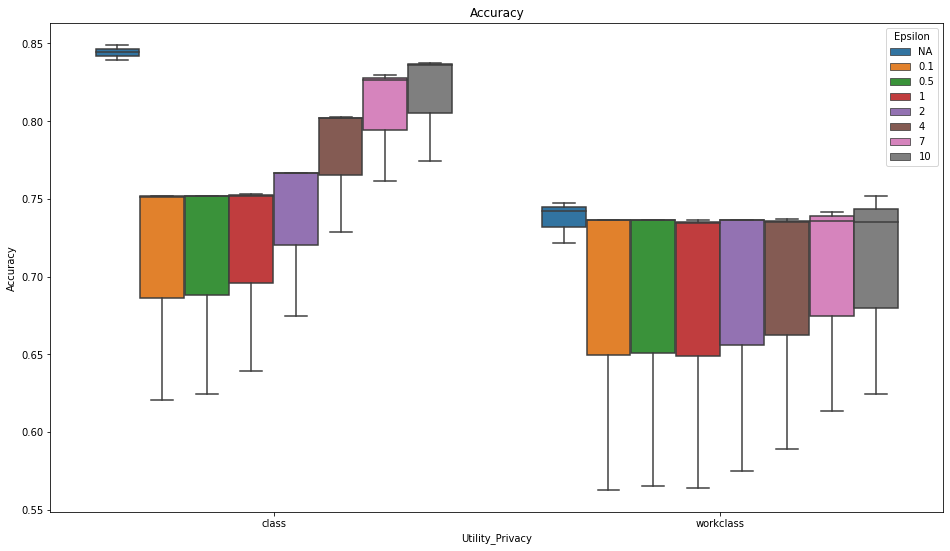

In [193]:
sns.boxplot(x='Utility_Privacy', y='Accuracy', data=sdf, hue='Epsilon')
plt.title('Accuracy')
plt.savefig('Accuracy.png',bbox_inches = 'tight',
    pad_inches = 0)

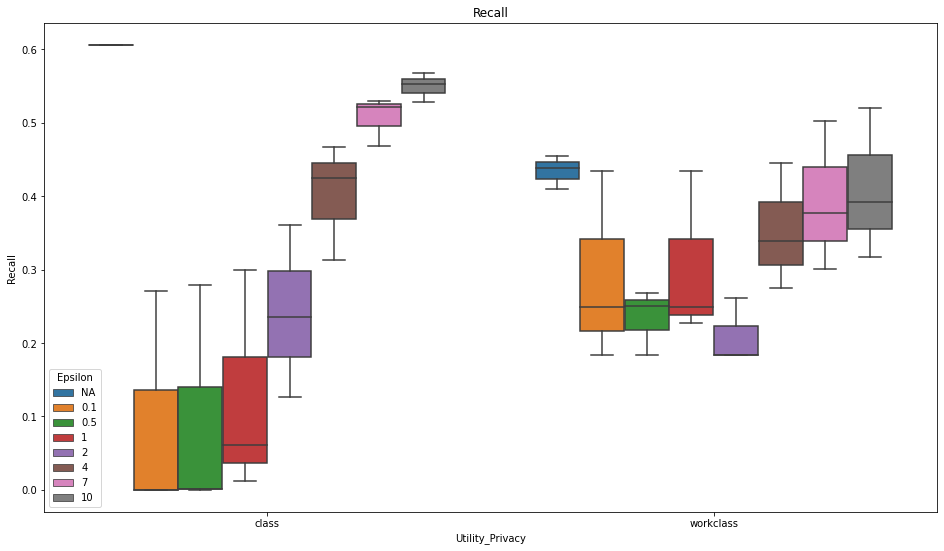

In [194]:
sns.boxplot(x='Utility_Privacy', y='Recall', data=sdf, hue='Epsilon')
plt.title('Recall')
plt.savefig('Sensitivity.png', bbox_inches = 'tight',
    pad_inches = 0)

### Base scores on classifying attribute 'class'
- KNeighborsClassifier [0.6565, 0.5988, 0.6263, 0.8229]
- DecisionTreeClassifier [0.6994, 0.588, 0.6389, 0.8352]
- RandomForestClassifier [0.7061, 0.6085, 0.6537, 0.8402]
- AdaBoostClassifier [0.7399, 0.6057, 0.6661, 0.8495]

### Base scores on classifying attribute 'workclass'
- KNeighborsClassifier [0.2038, 0.2221, 0.2125, 0.704]
- DecisionTreeClassifier [0.2041, 0.2358, 0.2188, 0.7242]
- RandomForestClassifier [0.2041, 0.251, 0.2251, 0.7429]
- AdaBoostClassifier [0.1858, 0.2619, 0.2174, 0.7481]

### Secure_x Score on classifying attribute 'class'
- KNeighborsClassifier [0.2394, 0.1456, 0.1811, 0.6736]
- DecisionTreeClassifier [0.2454, 0.0865, 0.1279, 0.7076]
- RandomForestClassifier [0.2487, 0.0662, 0.1046, 0.719]
- AdaBoostClassifier [0.0, 0.0, 0.0, 0.7522]

### Secure_x Score on classifying attribute 'workclass'
- KNeighborsClassifier [0.1429, 0.1437, 0.1433, 0.6375]
- DecisionTreeClassifier [0.1425, 0.1417, 0.1421, 0.6675]
- RandomForestClassifier [0.1416, 0.1371, 0.1393, 0.7015]
- AdaBoostClassifier [0.1428, 0.1052, 0.1212, 0.7364]

In [ ]:
StratifiedKFold()